<a href="https://colab.research.google.com/github/Shelb1nchik/cs102/blob/homework06/R_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
install.packages('dplyr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Задание 1

    1. Загрузите датасет music_genre.csv.
    2. Возьмите 20 тысяч случайных строк из датасета (все остальные задания выполняйте для этих 20 тысяч строк!!!)
    3. Проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их.
    4. Проверьте, есть ли а датасете строки, в которых значение в столбце artist_name – empty_field. Если есть, выведите эти строки и их количество. А затем удалите из датасета.



In [6]:
music <- read.csv("music_genre.csv")
music <- music[sample(nrow(music), 20000, replace=F),]
head(music)

if (nrow(music[duplicated(music), ]) > 0) {
music <- distinct(music)
}

empty_rows <- music[music$artist_name == "empty_field", ]

if (nrow(empty_rows) > 0) {
  music <- music[!(music$artist_name == "empty_field"), ]
} else {
  cat("Нет дубликатов строк")
}

music <- na.omit(music)

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
16797,87670,Radiohead,Burn the Witch,56,0.30300,0.541,220609,0.8470,2.71e-01,B,0.1090,-6.520,Major,0.0297,148.937,4-Apr,0.6200,Alternative
39881,79735,Matt Nathanson,Faster,50,0.00743,0.742,208280,0.8530,4.79e-06,A,0.3320,-4.147,Major,0.0393,?,4-Apr,0.9500,Rock
28480,69353,G-Eazy,Lady Killers (feat. Hoodie Allen),62,0.00193,0.394,249401,0.7710,0.00e+00,D#,0.1140,-6.873,Major,0.2900,145.947,4-Apr,0.5480,Rap
39551,35240,Jake Owen,The One That Got Away,56,0.03430,0.576,194173,0.8650,5.32e-05,C,0.2520,-3.288,Major,0.0407,119.913,4-Apr,0.5350,Rock
7328,85760,Yuki Hayashi,Isolation,21,0.94000,0.171,-1,0.1580,7.82e-01,C,0.0782,-14.914,Minor,0.0421,90.152,3-Apr,0.1580,Anime
40266,91674,Frédéric Chopin,"Fantasy-impromptu in C-Sharp Minor, Op. Posth. 66",36,0.99200,0.208,281000,0.0704,8.93e-01,C#,0.0799,-24.306,Major,0.0364,70.327,4-Apr,0.0605,Classical


Задание 2

    1. Выведите долю каждого жанра в датасете.
    2. Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.
    3. Найдите самый танцевальный жанр. У самого танцевального жанра среднее значение показателя danceability должно быть наивысшим.
    4. Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше (минор или мажор).


In [7]:
# 2.1 Выведите долю каждого жанра в датасете
genre_props <- prop.table(table(music$music_genre))

cat("Доля каждого жанра в датасете:\n")
print(genre_props)

Доля каждого жанра в датасете:

Alternative       Anime       Blues   Classical     Country  Electronic 
 0.09757253  0.09883629  0.09952083  0.09836238  0.10283819  0.10088990 
    Hip-Hop        Jazz         Rap        Rock 
 0.10104786  0.10231162  0.09730925  0.10131115 


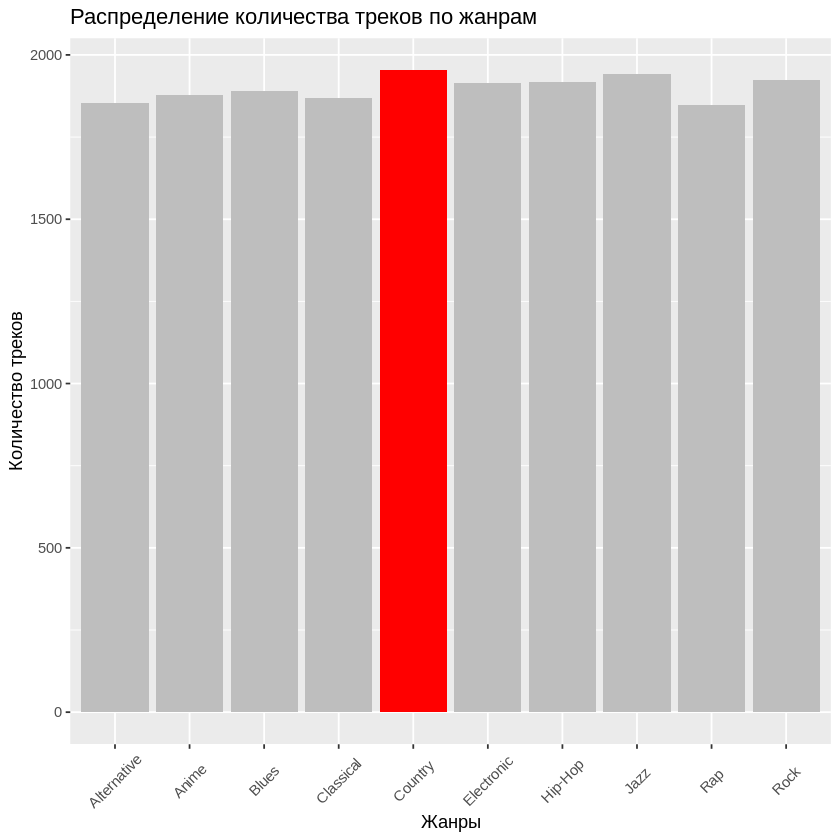

In [12]:
# 2.2 Распределение количества треков по жанрам
library(ggplot2)

genre_count <- music %>%
  group_by(music_genre) %>%
  summarize(track_count = n()) %>%
  arrange(desc(track_count))

ggplot(genre_count, aes(x = music_genre, y = track_count)) +
  geom_col(fill = ifelse(genre_count$music_genre[1] == genre_count$music_genre, "red", "grey")) + 
  labs(title = "Распределение количества треков по жанрам",
       x = "Жанры",
       y = "Количество треков") +
  theme(axis.text.x = element_text(angle = 45, vjust = 0.5))

In [13]:
# 2.3 Самый танцевальный жанр
danceability_by_genre <- music %>% 
  group_by(music_genre) %>% 
  summarize(mean_danceability = mean(danceability))

most_danceable_genre <- danceability_by_genre %>% 
  arrange(desc(mean_danceability)) %>% 
  head(1)

cat("Самый танцевальный жанр:", most_danceable_genre$music_genre, "\n")
cat("Среднее значение показателя danceability:", most_danceable_genre$mean_danceability, "\n")

Самый танцевальный жанр: Hip-Hop 
Среднее значение показателя danceability: 0.7182157 


`summarise()` has grouped output by 'music_genre'. You can override using the
`.groups` argument.


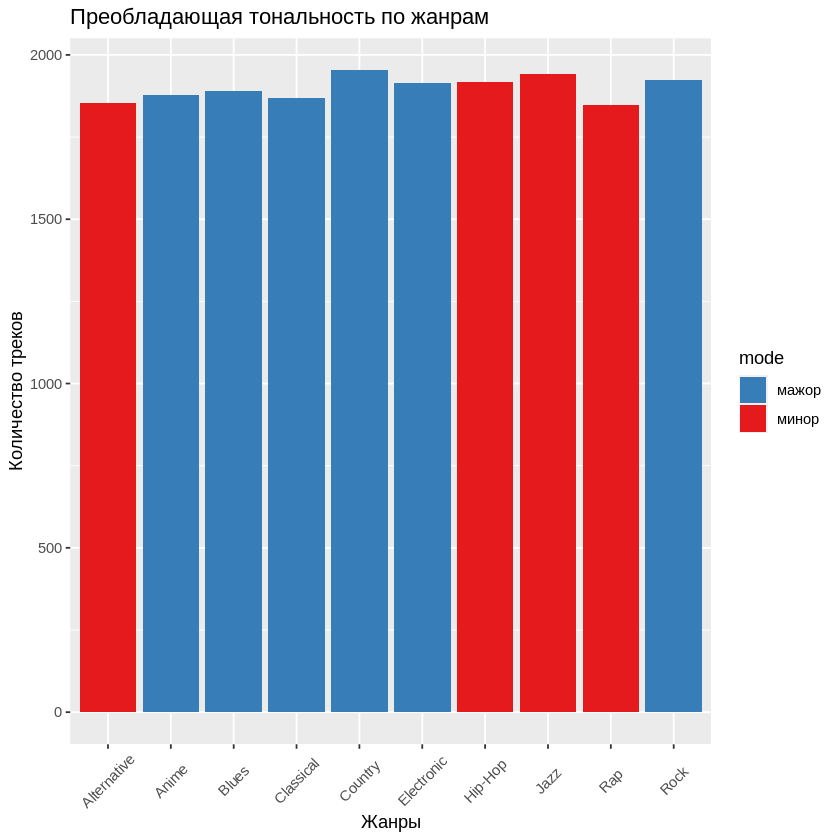

In [14]:
# 2.4 Преобладание тональности
tonality_by_genre <- music %>%
  group_by(music_genre, key) %>%
  summarise(track_count = n()) %>%
  mutate(mode = ifelse(sum(key == "C") == 0 & sum(key == "D") == 0, "No tracks",
                       ifelse(track_count[key == "C"] < track_count[key == "D"], "major", "minor")))

ggplot(tonality_by_genre, aes(x = music_genre, y = track_count, fill = mode)) +
  geom_bar(stat = "identity") +
  labs(title = "Преобладающая тональность по жанрам", 
       x = "Жанры", y = "Количество треков") +
  scale_fill_manual(values = c("#377eb8", "#e41a1c", "#999999"), 
                    labels = c("мажор", "минор")) +
  theme(axis.text.x = element_text(angle = 45, vjust = 0.5))

Задание 3

    1. Выведите исполнителя, у которого больше всего треков в датасете. И того, у которого их меньше всех.
    2. Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.


In [18]:
# 3.1 Исполнитель с наибольшим и наименьшим количеством треков
most_tracks <- names(sort(table(music$artist_name), decreasing = TRUE)[1])
most_count <- max(table(music$artist_name))
cat("Исполнитель с наибольшим количеством треков:", most_tracks, "(", most_count, "треков)\n")

least_tracks <- names(sort(table(music$artist_name))[1])
least_count <- min(table(music$artist_name))
cat("Исполнитель с наименьшим количеством треков:", least_tracks, "(", least_count, "трек)\n")

Исполнитель с наибольшим количеством треков: Nobuo Uematsu ( 187 треков)
Исполнитель с наименьшим количеством треков: ? & The Mysterians ( 1 трек)


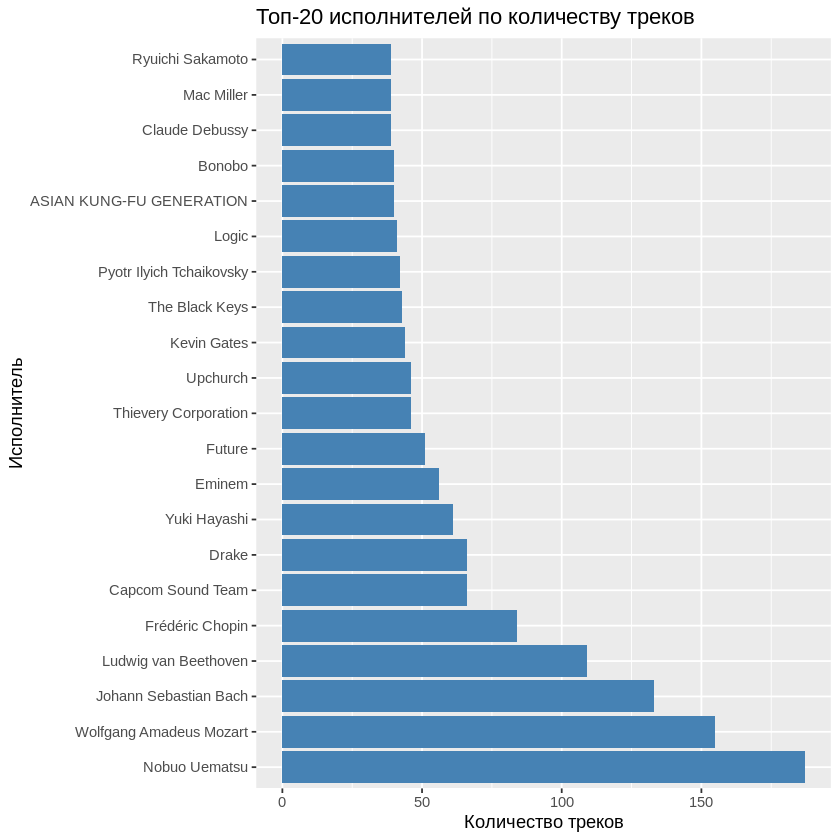

In [17]:
# 3.2 Топ 20 исполнителей
library(ggplot2)

top_artists <- music %>%
  group_by(artist_name) %>%
  summarize(total_songs = n()) %>%
  top_n(20, total_songs) %>%
  arrange(desc(total_songs))

ggplot(top_artists, aes(y = reorder(artist_name, -total_songs), x = total_songs)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  theme(axis.text.y = element_text(hjust = 1)) +
  ggtitle("Топ-20 исполнителей по количеству треков") +
  xlab("Количество треков") +
  ylab("Исполнитель")

Вывод: У первых 14 исполнителей разница в количестве треков гораздо меньше, чем у оставшихся 6

Задание 4

    1. Постройте корреляционную матрицу для характеристик треков. Между какими характеристиками сильная корреляция? Между какими слабая? Есть ли характеристики, между которыми корреляции практически нет.
    2. Посчитайте корреляцию между популярностью (popularity) и длиной названия трека.



In [19]:
install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



In [20]:
install.packages("palmerpenguins")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [21]:
music$tempo <- as.numeric(music$tempo)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


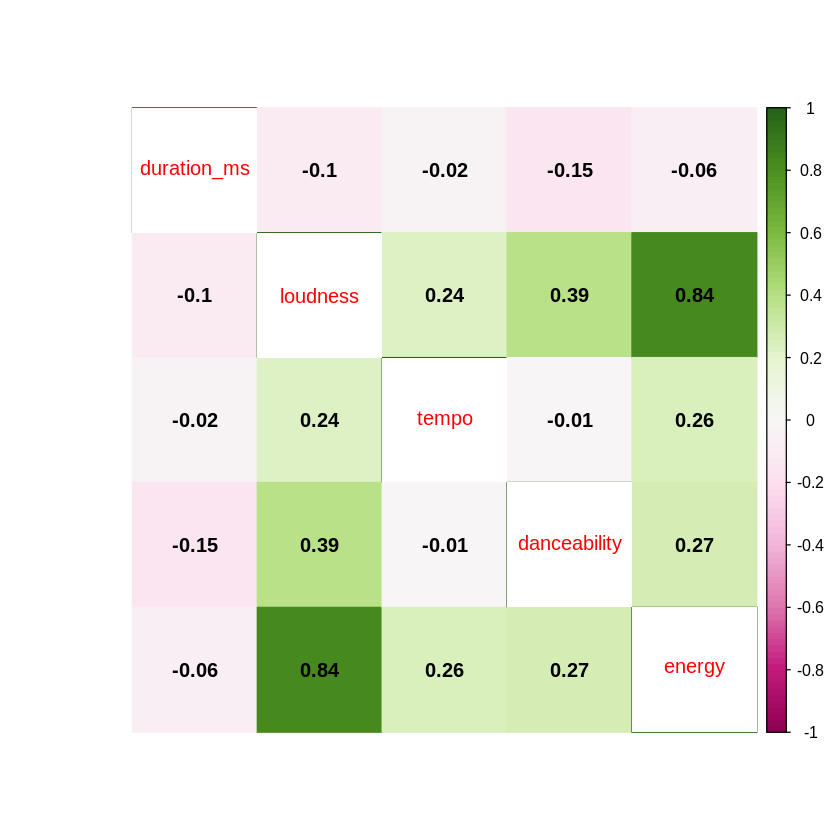

In [22]:
# 4.1 Корреляционная таблица
library(corrplot)
library(RColorBrewer)

data_clean <- na.omit(music[c('duration_ms', 'loudness', 'tempo', 'danceability', 'energy')])
data_clean$tempo <- as.numeric(data_clean$tempo)

cor_mat <- cor(data_clean)

col_ramp <- colorRampPalette(brewer.pal(11, 'PiYG'))
corrplot(cor_mat, method = "color", tl.pos = "d", addCoef.col = "black", col = col_ramp(100))

Наибольшая корреляция: между громкостью и энергичностью. Наименьшая: темп и танцевальность

In [24]:
# 4.2 Корреляция между популярностью и длительностью трека
cor(music$popularity, nchar(as.character(music$duration_ms)))

[1] 0.01690863

Задание 5

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

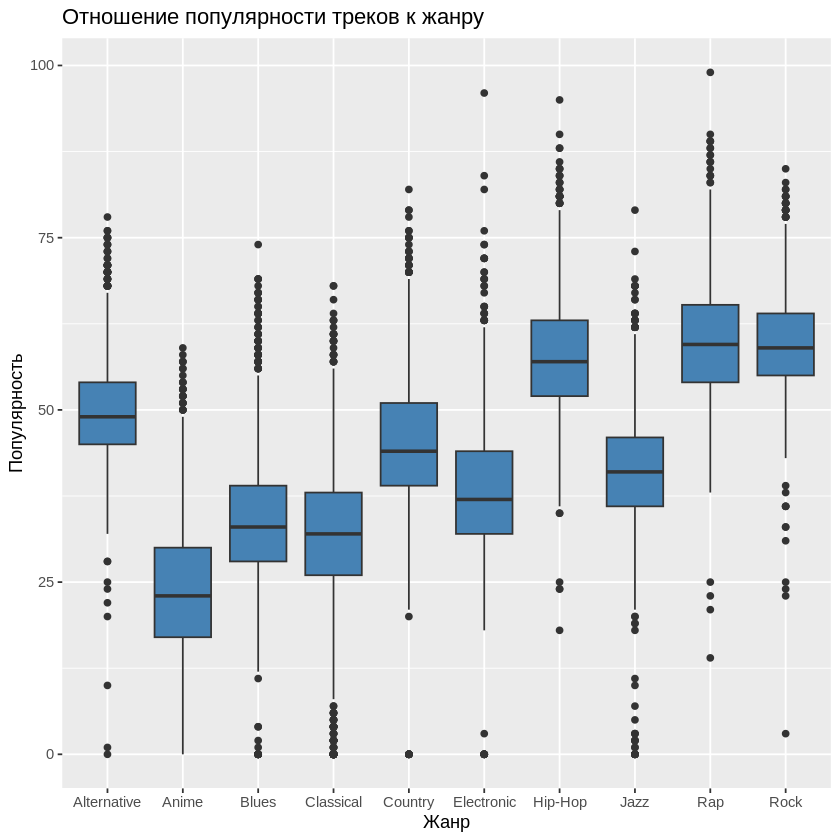

In [25]:
# 5.1 Отношение популярности трека к жанру
library(ggplot2)

ggplot(music, aes(x = music_genre, y = popularity)) +
  geom_boxplot(fill = "steelblue") +
  ggtitle("Отношение популярности треков к жанру") +
  xlab("Жанр") +
  ylab("Популярность")

Наиболее похожие: Блюз и классика, рэп и рок

Задание 7

На вертикальной столбиковой диаграмме для самого популярного (popularity) и самого непопулярного жанров покажите средние значения по всем характеристикам. Отрицательные и положительные значения характеристик показывайте разными цветами.


Задание 8

    1. Добавьте в данные категориальный столбец длительность_трека, в котором будут значения: "короткая" (<=3min), "средняя" (>3min, <=5min), "длинная" (>5min).
    2. Покажите график плотности распределения данных в столбце loudness, сгруппированных по категориям длительности.
    3. На круговой диаграмме покажите численное соотношение треков разной длительности.



In [36]:
install.packages("plotly")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [37]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [38]:
sum(is.na(music))

[1] 1897

In [ ]:
music <- na.omit(music)

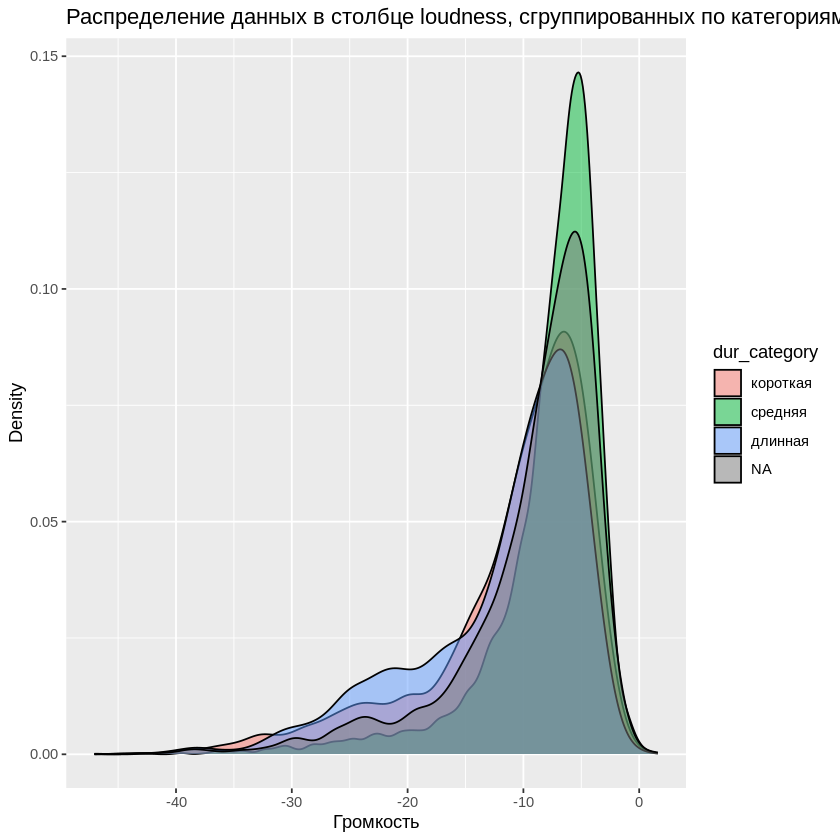

In [39]:
# 8.2 График плотности распределения данных в стобце loudness, сгрупированных по длительности
library(dplyr)
library(ggplot2)

music <- music %>%
  mutate(dur_category = cut(duration_ms/60000, 
                             breaks = c(0, 3, 5, Inf), 
                             labels = c("короткая", "средняя", "длинная")))

ggplot(music, aes(x = loudness, fill = dur_category)) +
  geom_density(alpha = 0.5) +
  xlab("Громкость") +
  ylab("Density") +
  ggtitle("Распределение данных в столбце loudness, сгруппированных по категориям длительности")

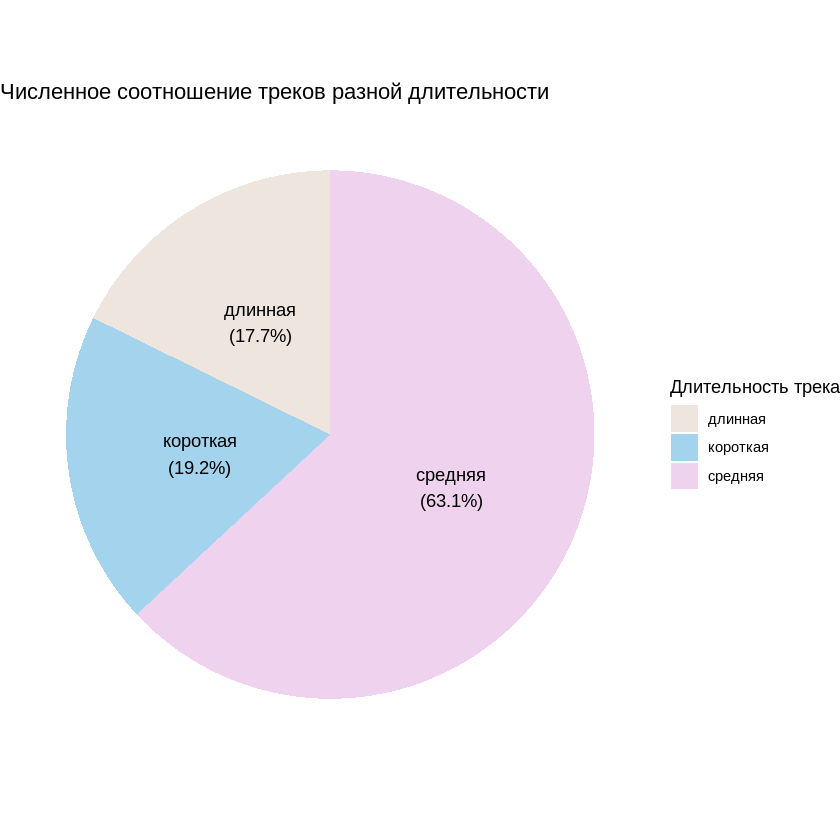

In [40]:
# 8.3 Соотношение треков разной длительности
dur_category <- table(music$dur_category)
duration_perc <- prop.table(dur_category) * 100
duration_labels <- paste0(names(dur_category), "\n(", round(duration_perc, 1), "%)")

ggplot(data = data.frame(duration = names(dur_category), count = as.numeric(dur_category)),
       aes(x = "", y = count, fill = duration)) +
  geom_bar(stat = "identity") + coord_polar(theta = "y") + theme_void() +
  scale_fill_manual(values = c("seashell2", "lightskyblue2", "thistle2"), name = "Длительность трека") +
  labs(title = "Численное соотношение треков разной длительности") +
  geom_text(aes(label = duration_labels), position = position_stack(vjust = 0.5))